# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [8]:
#import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#Load datasets
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

## <font color = blue> 2. Data Manipulationa and visualization

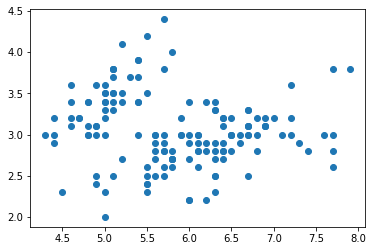

In [55]:
#visualize your data here
x = df['sepal length (cm)']
y = df['sepal width (cm)']

plt.scatter(x,y)
plt.show()

## <font color = blue> 3. Train model

In [33]:
#train your model here
X = df[['sepal length (cm)','sepal width (cm)']]
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
model = km.fit(X)

## <font color = blue> 4. Explore KMeans attributes

In [39]:
#check Kmean algorithm's attribute
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=150, 
    tol=1e-04, random_state=0
)

model = km.fit(X)

## <font color = blue> 5. Prediction

In [48]:
#create sample data to make prediction. Interpret your output for unsupervised clustering
x_sample = [[2.31,3]]
y_km = km.predict(x_sample)
y_km

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [52]:
km.labels_ #the 150 datasets are grouped into  three clussters either 1,0,2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

So the given sample falls under cluster 1 

## <font color = blue> 6. Plotting clusters with thier centroids

In [49]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

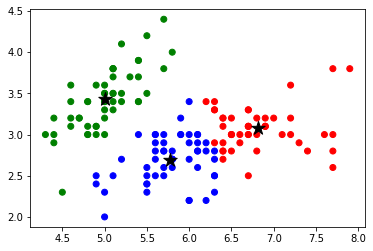

In [67]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
color = np.array(['b','g','r'])
categories = km.predict(X)
plt.scatter(x,y,c = color[categories])

centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,marker='*')

# plt.scatter(5.77358491, 2.69245283,s = 200,c='black',marker='*')
# plt.scatter(5.006, 3.428 ,s = 200,c='black',marker='*')
# plt.scatter(6.81276596, 3.07446809,s = 200,c='black',marker='*')
# plt.show()



## <font color = blue> 7. Use elbow method to choose K for Kmean

In [70]:
# plot grah to decide K value for given dataset.

distortion = []
k = range(1,4)
for i in k:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X)
    distortion.append(kmeanModel.inertia_)


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
plt.figure(figsize = (16,6))
plt.plot(k,distortion,'bx-')
plt.xlabel('k')
plt.ylabel('disto')